# Introduction à Keras 

"
Keras is a model-level library, providing high-level building blocks for developing deep learning models. It does not handle itself low-level operations such as tensor products, convolutions and so on. Instead, it relies on a specialized, well-optimized tensor manipulation library to do so, serving as the “backend engine” of Keras.*
The Python Keras API uses TensorFlow™ as it’s default tensor backend engine, however it’s possible to use other backends if desired. At this time, Keras has three backend implementations available:
-  TensorFlow is an open-source symbolic tensor manipulation framework developed by Google.
-  Theano is an open-source symbolic tensor manipulation framework developed by LISA Lab at Université de Montréal.
-  CNTK is an open-source toolkit for deep learning developed by Microsoft.
"

> Vérifier que la libraire Keras est bien installée.
> Dans le cas contraire vous pouvez installer Keras via le [gestionnaire d'environnement d'Anaconda](https://www.logicalfeed.com/posts/1224/install-tensorflow-keras-and-theano-using-anaconda-for-deep-learning), en [ligne de commandes conda](https://anaconda.org/conda-forge/keras) ou encore avec `pip install Keras`.

In [2]:
pip install Keras

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------------------------------------- -- 1.3/1.4 MB 17.5 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 14.5 MB/s eta 0:00:00

   ------------------------ --------------- 3/5 [absl-py]
   -------------------------------- ------- 4/5 [Keras]
   -------------------------------- ------- 4/5 [Keras]
   -------------------------------- ------- 4/5 [Keras]
   -------------------------------- ------- 4/5 [Keras]
   -------------------------------- ------- 4/5 [Keras]
   -------------------------------- ------- 4/5 [Keras]
   -------------------------------- ------- 4/5 [Keras]
   -------------------------------- ------- 4/5 [Keras]
   -------------------------------- ------- 4/5 [Keras]
   -------------------------------- ------- 4/5 [Keras]
   -------------------------------- ------- 4/5 [Keras]
   -------------------------------- ------- 4/5 [Keras]
   -------------------------------- ------- 4/

In [2]:
from tensorflow import keras

## Importation des données

Dans ce TP, nous allons illustrer les fonctionnalitées de [Keras](https://keras.io/getting_started/intro_to_keras_for_engineers/) sur la base de données des [handwritten digits](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits) de sckit-learn.

Il s'agit d'un problème de classification à 10 classes (10 digits). 

In [3]:
%matplotlib inline 
import matplotlib.pyplot as plt

In [4]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

In [5]:
digits = load_digits()

In [6]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

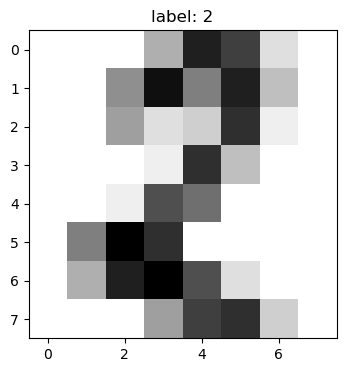

In [7]:
sample_index = 50
plt.figure(figsize=(4, 4))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.title("label: %d" % digits.target[sample_index]);
plt.show()

In [8]:
print(digits.target,'\n\n', len(digits.target))

[0 1 2 ... 8 9 8] 

 1797


> Normaliser les données avec la fonction `preprocessing.scale()` et séparer celles-ci en deux échantillons d'apprentissage et de test. Afficher la dimension des deux jeux de données.

In [9]:
digits.data_nor = preprocessing.scale(digits.data)

X_train_nor, X_test_nor, y_train, y_test = train_test_split(digits.data_nor,digits.target, test_size=0.2)

In [10]:
np.argmax(X_test_nor[1])

np.int64(20)

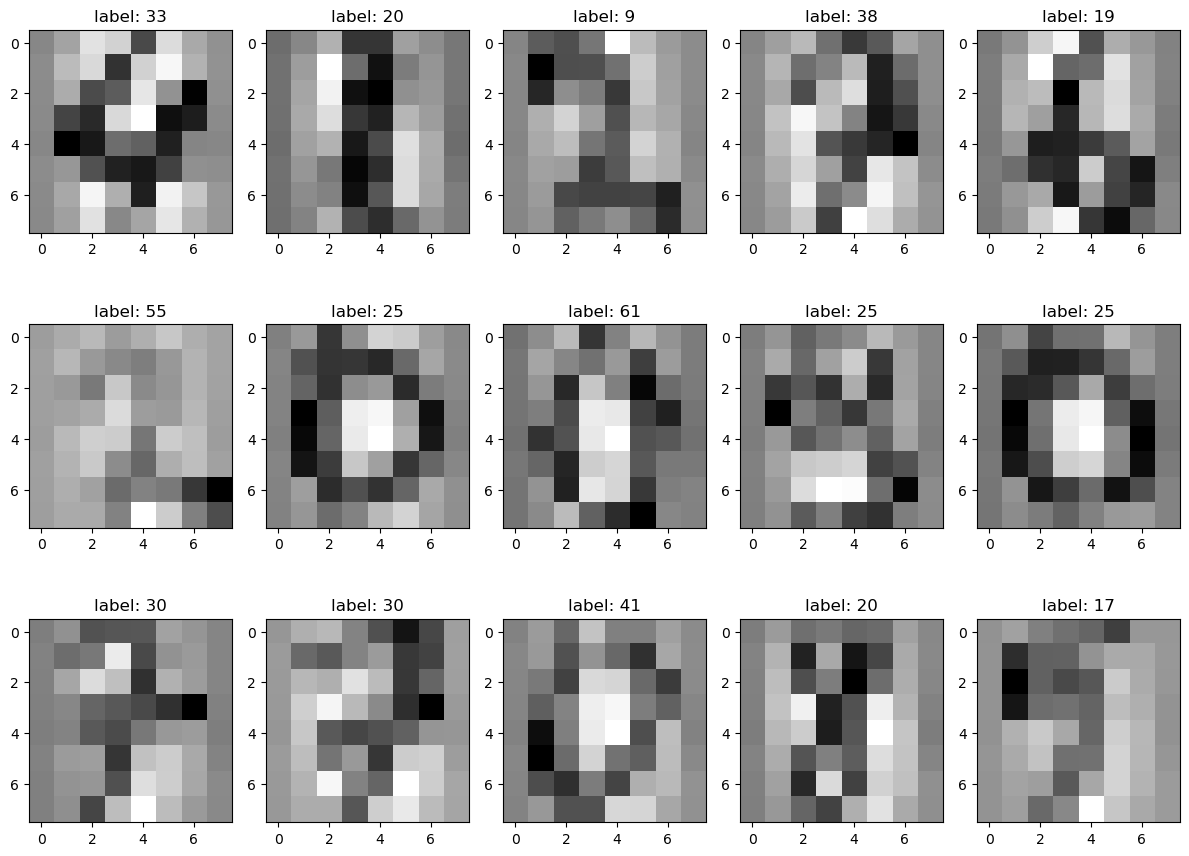

In [11]:
plt.figure(figsize=(12, 9))

for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test_nor[i].reshape(8, 8),
               cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("label: %d" % np.argmax(X_test_nor[i]));
plt.tight_layout()
plt.show()

Les dimensions des deux jeux de données:

In [12]:
print(X_train_nor.shape, y_train.shape)
print(X_test_nor.shape, y_test.shape)

(1437, 64) (1437,)
(360, 64) (360,)


## Feed Forward Neural Network avec Keras

Nous allons maintenant définir et ajuster un modèle à propagation avant (Feed Forward) avec Keras.

#### Pre-processing

La variable de classe (chiffre correspondant) indique le numéro de la catégorie : 

In [13]:
y_train[:3]

array([3, 9, 0])

Avec Keras, pour construire un réseau de neurones adapté à ce problème de la classification multiclasses, il faut préalablement transformer la variable de classe sous la forme "one hot encoding" i.e. transformer la variable de classe en un vecteur indiquant l'appartenance à chacune des classes sous forme d'indicatrices :

In [14]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
Y_train[:3]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

#### Definition de l'architecture

Nous allons maintenant construire un premier réseau à propagation avant :

In [15]:
from tensorflow.keras.models import Sequential

On importe les fonctionnalités qui permettent de définir, de façon successive, les différentes couches :
- Dense : permet de définir les pré-activations, c'est dans cette couche que se situent les poids et les termes de biais.
- Activation :  permet de définir les fonctions d'activation.

In [16]:
from tensorflow.keras.layers import Dense, Activation

Les dimensions du modèle : 

In [17]:
N = X_train_nor.shape[1]  # dimension en entrée
N

64

In [18]:
H = 128 # dimension de la couche cachée
K = 10  # nombre de classes en sortie (autant que de chiffres ici)

On peut maintenant définir l'architecture du réseau :

In [19]:
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("relu"))
model.add(Dense(K))
model.add(Activation("softmax"))

C:\Users\kassi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Il est possible de résumer l'architecture avec la méthode `summary()`:

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,610 (37.54 KB)

 Trainable params: 9,610 (37.54 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


Le nombre de paramètres est indiqué dans la dernière colonne, notez que seules les couches `dense` contiennent ici des paramètres à ajuster.

Les dimensions en sortie de chaque couche sont de la forme `(None, ...)`. Lorsque le réseau sera ajusté sur un échantillon, la première dimension indiquera la taille de l'échantillon.

Vous pouvez visualiser (dans un fichier .png) l'architecture ainsi. Si vous êtes confronté à des problèmes d'installation (librairies `pydot`, `graphviz` ...), ne perdez pas trop de temps sur cette partie.

In [23]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


#### Poids du réseau

Le contenu (les poids) de chaque couche du réseau est accessible dans la liste `model.layers`. Par exemple pour la premiere couche :

In [24]:
my_first_layer = model.layers[0]
my_first_layer

<Dense name=dense, built=True>

Le tableau contenant les valeurs des poids et les termes de biais de cette première couche sont accessibles avec la méthode `get_weights()`. La méthode renvoie en fait une liste contenant
- le tableau numpy des poids,
- le vecteur des termes de biais.

> Vérifier que le tableau des poids ainsi que les termes de biais possèdent les dimensions attendues compte tenu de ce que nous avons vu dans le `model.summary()` plus haut. Retrouvez le nombre de paramètres affichés dans le `model.summary()`.

In [25]:
len(model.get_weights()[0])

64

In [26]:
len(model.get_weights()[1])

128

> Bien que le réseau n'ait pas encore été ajusté sur des données, vérifier que la définition de l'architecture implique une intialisation immédiate des poids du réseau (i.e. les poids prennent des valeurs). 
> Vérifier aussi que les biais sont initialisés à zéro.

In [27]:
model.get_weights()#les biais est données par les tableaux d'indexation impaire

[array([[-0.10868901,  0.16246445,  0.1460994 , ...,  0.10189234,
         -0.11105193,  0.08061077],
        [-0.06788563, -0.09885459, -0.05972073, ...,  0.03882176,
          0.0744683 ,  0.15721978],
        [ 0.12859146, -0.02357602, -0.06265424, ...,  0.05784744,
          0.08575635,  0.03576337],
        ...,
        [-0.01020072,  0.10280414, -0.16323444, ...,  0.03998969,
         -0.14881697,  0.15535046],
        [-0.02003653,  0.08864544,  0.12254263, ..., -0.08290892,
         -0.06239554,  0.15350927],
        [-0.11326598, -0.14220533,  0.01767083, ..., -0.0397632 ,
         -0.13064697,  0.01639706]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

### Apprentissage : ajustement des poids du réseau

**La phase d'apprentissage consiste à estimer le vecteur $\theta$ (qui contient tous les paramètres du réseau : poids et biais) en cherchant à minimiser en $\theta$ le risque empirique (ici sans pénalité)**
$$ \theta \mapsto \frac 1{n} \sum_{i=1}^n  \ell( f(X_i , \theta),Y_i) $$
où $f(\cdot , \theta)$ est la fonction qui correspond au réseau de neurones et où $\ell$ est la perte choisie. Pour le problème de classification multiclasses qui nous intéresse ici il s'agit de la cross-entropy.

On utilise pour cela une méthode d'optimisation de type descente de gradient stochastique, appliquée au risque empirique pénalisé. Par exemple pour `SGD`, chaque itération effectue un pas de gradient, en calculant ce gradient sur un sous-échantillon des données (échantillon batch):
$$ \theta_b  =   \theta_{b-1}  - \varepsilon   \frac 1{|B|} \sum_{i \in B}  \nabla_\theta \ell( f(X_i , \theta_{b-1}),Y_i)   
 $$
où $\varepsilon$ est le taux d'apprentissage (learning rate).

Le module `optimizers` de Keras permet de choisir la méthode d'optimisation. On utilise ci-dessous l'optimiseur `SGD`, avec l'argument `lr` pour régler le taux d'apprentissage :

In [28]:
from tensorflow.keras.optimizers import SGD
sgd = SGD(learning_rate=0.1)

Nous allons maintenant ajuster sur les données digits un réseau de neurones à une couche cachée.

L'ajustement est effectué en deux temps : compilation puis ajustement sur les données.

On spécifie les éléments nécessaires à l'ajustement  avec la méthode  `compile` :
- optimiseur,
- perte considérée pour la back propagation (dans l'algo de descente de gradient)
- "métriques" à considérer pour évaluer l'erreur. On pourrait bien sûr évaluer l'erreur uniquement pour la cross-entropy, mais l'erreur pour la perte sèche $\ell(y,y') = 1_{y \neq y'}$ est plus facile à interpréter, on choisit donc de suivre  aussi la métrique "accuracy" (précision = taux de bien classé) le long de la trajectoire de descente de gradient.

In [29]:
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Dans les arguments de la méthode `.fit` ci-dessous:
- epochs = nombre de passages sur l'ensemble de l'échantillon  ;
- batch_size = taille du sous-échantillon extrait (batch) pour le calcul du gradient à chaque itération.

In [30]:
model.fit(X_train_nor, Y_train, epochs=10, batch_size=32)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7794 - loss: 0.9111   
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9450 - loss: 0.2672 
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9694 - loss: 0.1681 
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9784 - loss: 0.1242 
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9826 - loss: 0.0984 
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9903 - loss: 0.0804 
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9944 - loss: 0.0680 
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9958 - loss: 0.0584 
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9965 - loss: 0.0509 
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9972 - loss: 0.0448 


> Chaque ligne correspond à un passage sur l'ensemble des données (= un epoch). Nous avons choisi un batch size de 32 observations. Combien de pas de gradients sont donc effectués par epoch pour ce choix de paramètres ?

In [31]:
batch_size = 32
taille = X_train_nor.shape[0]
pas = int(np.ceil(taille/batch_size))
pas


45

> La perte cross entropy (ici utilisé pour désigner le risque empirique pour la cross entropy) et la précision (accuracy) s'améliorent-elles le long de la trajectoire de descente de gradient ?

Les poids sont enregistrés dans `model.layers`. 

> Les biais sont ils toujours à zero ?

In [32]:
model.get_weights()[1]

array([ 0.04043596,  0.07100797,  0.06155287,  0.04545571,  0.09291905,
       -0.00837055, -0.01005162,  0.02528262, -0.00226421,  0.01635117,
       -0.0432026 ,  0.00915634,  0.00143669,  0.06406304, -0.01743597,
        0.01618483,  0.00078569,  0.05816169,  0.02918325,  0.09941372,
        0.10548415,  0.00569503,  0.00743394,  0.00496196,  0.08392398,
        0.01395192, -0.01493843,  0.11459301,  0.06202892,  0.07974374,
        0.04715971,  0.03555881,  0.02759711, -0.010184  ,  0.08371117,
        0.04720049,  0.03155793,  0.02459821, -0.02254154,  0.06607463,
        0.13633803,  0.07820313,  0.05995888,  0.03518989,  0.05154511,
        0.09829334,  0.02902633, -0.00030974,  0.067325  ,  0.11424941,
       -0.05855633,  0.05193488, -0.02561088, -0.0509436 ,  0.03070983,
        0.03539375, -0.05059529,  0.05468345,  0.00035366,  0.00724179,
        0.06198815,  0.066126  ,  0.07569095,  0.04866668,  0.06225944,
        0.02906773,  0.01876597,  0.05437402,  0.03770715,  0.05

> En comparant les valeurs de la perte et de l'accuracy, vérifier (sur les sorties) que si l'on effectue l'ajustement une seconde fois, l'état initial pour le second essai correspond à l'état du réseau précédemment ajusté.

In [33]:
model.fit(X_train_nor, Y_train, epochs=20, batch_size=32)

Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9965 - loss: 0.0401 
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9979 - loss: 0.0362 
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9979 - loss: 0.0329 
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9972 - loss: 0.0299 
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9979 - loss: 0.0274 
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9986 - loss: 0.0251 
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9979 - loss: 0.0234 
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9986 - loss: 0.0217 
Epoch 9/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9993 - loss: 0.0203 
Epoch 10/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9993 - loss: 0.0190 
Epoch 11/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9993 - loss: 0.0178 
Epoch 12/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 

In [34]:
X_train_nor, X_test_nor, y_train, y_test = train_test_split(digits.data_nor,digits.target, test_size=0.2)

In [35]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

> Essayer de diminuer encore la perte en augmentant le nombre d'épochs, en diminuant le taux d'apprentissage (par exemple 0.001).   
> Remarque : si vous souhaitez réinitialiser les poids, il vous faut "réinstancier" le modèle en le redéfinissant totalement. 

In [36]:
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("relu"))
model.add(Dense(K))
model.add(Activation("softmax"))

sgd = SGD(learning_rate=0.001)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
X_train_nor1, X_test_nor, y_train, y_test = train_test_split(digits.data_nor,digits.target, test_size=0.2)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
model.fit(X_train_nor1, Y_train, epochs=20, batch_size=32)

Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0974 - loss: 2.4885   
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0967 - loss: 2.4783 
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0953 - loss: 2.4690 
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0974 - loss: 2.4605 
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0960 - loss: 2.4526 
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0953 - loss: 2.4454 
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0974 - loss: 2.4387 
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0981 - loss: 2.4325 
Epoch 9/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0974 - loss: 2.4266 
Epoch 10/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0995 - loss: 2.4212 
Epoch 11/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1002 - loss: 2.4160 
Epoch 12/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

In [37]:
model.get_weights()

[array([[ 0.13495733, -0.05383425, -0.02981094, ..., -0.04006413,
         -0.09961277, -0.01895432],
        [-0.01311132,  0.01916341, -0.03373944, ..., -0.03443262,
          0.09696767, -0.05498086],
        [ 0.04485841,  0.09679468, -0.10176672, ...,  0.14751044,
          0.03918617,  0.07291355],
        ...,
        [ 0.05917176, -0.16838583,  0.03563399, ..., -0.0250216 ,
          0.03160639,  0.18167305],
        [ 0.1502526 , -0.13586257, -0.1571476 , ..., -0.05627705,
         -0.00127197, -0.09688267],
        [ 0.02878939,  0.1612867 ,  0.10646562, ...,  0.13174798,
         -0.01953981, -0.01919188]], dtype=float32),
 array([-5.41109452e-03,  7.89334648e-04,  1.19611551e-03, -3.93208675e-03,
         6.82268350e-04, -1.59739371e-04, -2.71821686e-04,  1.38703990e-03,
         1.48041977e-03, -3.90255987e-03, -3.72533198e-03,  6.86952844e-03,
        -1.68364926e-03, -1.25338035e-02, -3.97723215e-03,  3.08546796e-03,
        -1.87078002e-03, -5.27714798e-03, -3.88836232e

> Que dire de la convergence pour une grande valeur du taux d'apprentissage (par exemple `lr=2`) ?

In [38]:
from tensorflow.keras.optimizers import SGD
sgd = SGD(learning_rate=2.0) 
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("relu"))
model.add(Dense(K))
model.add(Activation("softmax"))
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
X_train_nor1, X_test_nor, y_train, y_test = train_test_split(digits.data_nor,digits.target, test_size=0.2)
Y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
model.fit(X_train_nor1, Y_train, epochs=20, batch_size=32)

Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3994 - loss: 5139.7261
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5985 - loss: 397036.3125
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5087 - loss: 1745048704.0000
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5769 - loss: 430853259264.0000
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7112 - loss: 6463146688512.0000
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6242 - loss: 1235246418755584.0000
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6228 - loss: 64788340414611456.0000 
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5560 - loss: 12775967773478092800.0000
Epoch 9/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6806 - loss: 544550708249922371584.0000
Epoch 10/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5442 - loss: 425112783226010599424000.0000
Epoch 11/20
45/45 ━━━━━━━

> Essayer aussi d'utiliser une méthode `Momentum-SGD` (argument `momentum= True`).  

In [39]:
sgd = SGD(learning_rate=0.1) 
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("relu"))
model.add(Dense(K))
model.add(Activation("softmax"))
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
X_train_nor1, X_test_nor, y_train, y_test = train_test_split(digits.data_nor,digits.target, test_size=0.2)
Y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
model.fit(X_train_nor1, Y_train, epochs=40, batch_size=32 )

Epoch 1/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7794 - loss: 0.9196   
Epoch 2/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9436 - loss: 0.2751 
Epoch 3/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9652 - loss: 0.1739 
Epoch 4/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9798 - loss: 0.1281 
Epoch 5/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9840 - loss: 0.1019 
Epoch 6/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9875 - loss: 0.0845 
Epoch 7/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9882 - loss: 0.0714 
Epoch 8/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9903 - loss: 0.0612  
Epoch 9/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9937 - loss: 0.0539 
Epoch 10/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9958 - loss: 0.0473 
Epoch 11/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9958 - loss: 0.0422  
Epoch 12/40
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accura

In [40]:
sgd = SGD(learning_rate=0.01, momentum=0.9) 
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("relu"))
model.add(Dense(K))
model.add(Activation("softmax"))
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
             metrics=['accuracy'])
X_train_nor1, X_test_nor, y_train, y_test = train_test_split(digits.data_nor,digits.target, test_size=0.2)
Y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
model.fit(X_train_nor1, Y_train, epochs=50, batch_size=32 )

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6548 - loss: 1.2363
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9422 - loss: 0.2893 
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9680 - loss: 0.1746 
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9763 - loss: 0.1290 
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9819 - loss: 0.1023 
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9875 - loss: 0.0851 
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9889 - loss: 0.0727 
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9923 - loss: 0.0628 
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9937 - loss: 0.0555 
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9944 - loss: 0.0489 
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9951 - loss: 0.0435 
Epoch 12/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

### Predictions et erreur de généralisation

> Effectuer des prédictions de votre réseau sur l'échantillon test avec la méthode `.predict()`.

In [41]:
y_predicted = model.predict(X_test_nor)
y_predicted

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


array([[5.12059160e-07, 4.10363242e-07, 3.95113806e-04, ...,
        9.98425245e-01, 2.77652163e-07, 3.86549305e-04],
       [6.36751736e-07, 9.58830211e-03, 9.89462078e-01, ...,
        6.74718990e-07, 9.78457319e-06, 1.06315965e-04],
       [8.80112072e-09, 3.23488258e-08, 9.99970198e-01, ...,
        2.47459067e-08, 8.41266470e-08, 1.60221248e-06],
       ...,
       [3.27249182e-07, 9.98811245e-01, 5.87282216e-07, ...,
        8.31974739e-06, 1.12634641e-03, 1.23786435e-07],
       [3.25568067e-06, 1.67941579e-07, 1.41569240e-06, ...,
        1.99800681e-07, 9.99458253e-01, 5.25882642e-04],
       [3.64819797e-09, 3.71981344e-08, 9.99972105e-01, ...,
        4.70508397e-08, 1.07748986e-06, 1.46246890e-07]], dtype=float32)

> Pour plusieurs élements de l'échantillon test, renvoyer les probabilités conditionnelles prédites par le réseau (en sortie du Softmax) à l'aide de la méthode `.model.predict()`. La probabilité de la classe choisie est-elle générallement bien supérieure aux probabilités des autres classes ?
Calculer le taux de bien classé sur l'échantillon test.

In [42]:
y_predicted[0]

array([5.1205916e-07, 4.1036324e-07, 3.9511381e-04, 7.7688677e-04,
       1.4655277e-05, 3.0544453e-07, 2.2664825e-08, 9.9842525e-01,
       2.7765216e-07, 3.8654931e-04], dtype=float32)

In [43]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

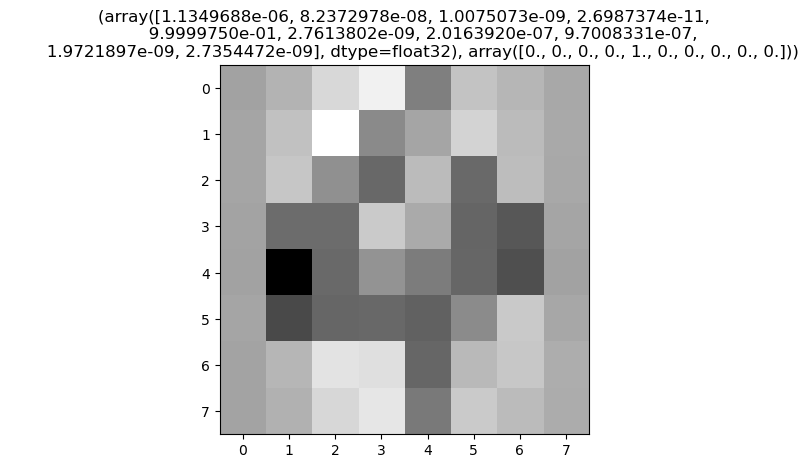

In [44]:
sample_idx = 60
plt.imshow(X_test_nor[sample_idx].reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest');
plt.title((y_predicted[sample_idx], y_test[sample_idx]))
plt.legend
plt.show()

In [45]:
len(y_test)==len(y_predicted)

True

On remarque que le modèle arrive à presque bien faire des prédictions.

In [46]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [47]:
probabilities = model.predict(X_test_nor)
sample_idx = 2
probabilities[sample_idx] 

print(y_predicted[sample_idx],'\n\n',y_test[sample_idx])

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[8.8011207e-09 3.2348826e-08 9.9997020e-01 2.7971653e-05 1.2631693e-08
 3.8813393e-09 7.2721928e-10 2.4745907e-08 8.4126647e-08 1.6022125e-06] 

 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [48]:
X_test_nor[0]

array([ 0.        , -0.33501649,  0.16729015,  0.98034282,  0.96867267,
        0.03850794, -0.40972392, -0.12502292, -0.05907756,  0.94080325,
        0.4829745 , -1.75519248, -0.68586377,  0.7972123 , -0.51499146,
       -0.13043338, -0.04462507, -0.44794995, -1.5649297 , -1.20543167,
       -0.33980201,  0.51547187, -0.54880546, -0.11422184, -0.03337973,
       -0.78510524, -1.46862699, -0.64974909,  0.66221904,  1.09838387,
        1.54181413, -0.04723238,  0.        , -0.67237227, -1.21260656,
       -0.64975519,  0.96064411, -0.1267705 , -0.25713138,  0.        ,
       -0.06134367, -0.5312841 , -1.05283456,  0.11985896,  0.05237785,
       -1.44653841, -0.79827225, -0.08874162, -0.03543326, -0.40357499,
       -1.15311752,  0.85365492, -1.2104822 , -1.45261152, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135,  0.28273565, -0.02035847,
       -2.39411016, -1.14664746, -0.5056698 , -0.19600752])

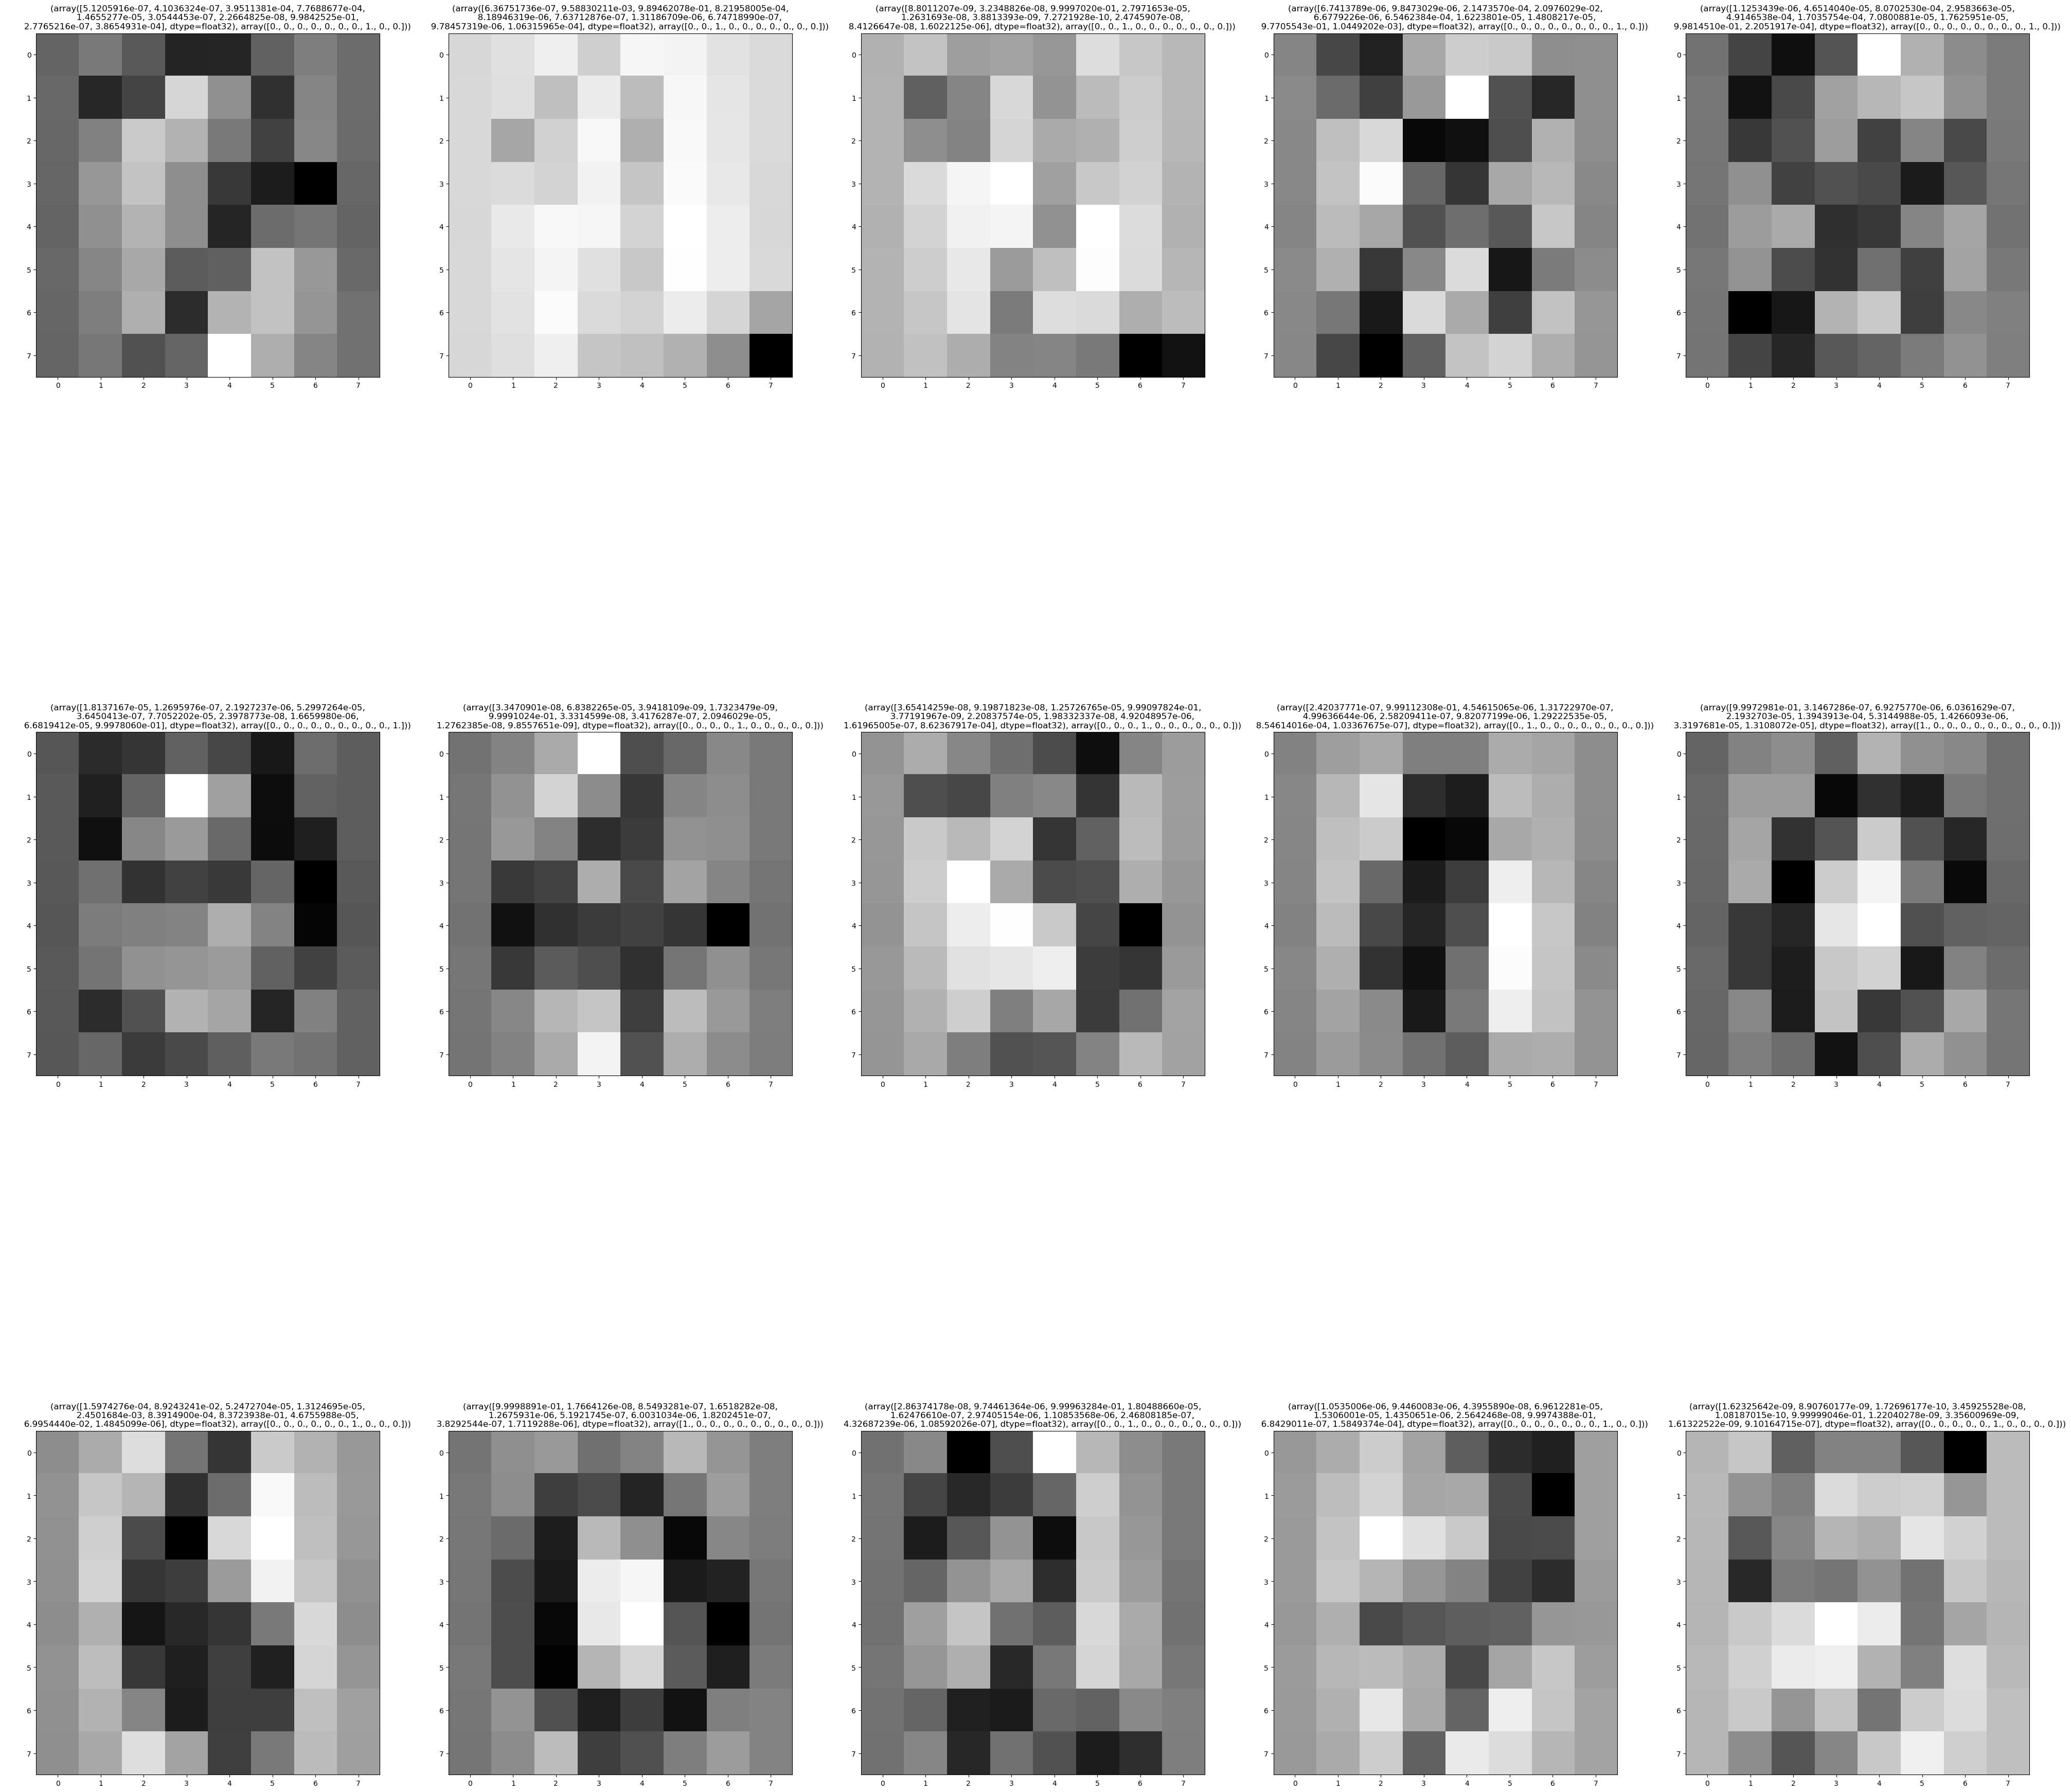

In [49]:
plt.figure(figsize=(50,50))

for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test_nor[i].reshape(8, 8),
               cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title((y_predicted[i], y_test[i]))

#plt.tight_layout()
plt.show()

Comme dit précédemment, le modèle fonctionne.

On rappelle que la perte empirique pour la cross-entropy vaut
\begin{eqnarray*}
\hat{ \mathcal R}_n (\theta)  &=&  \frac 1n  \sum_{i=1}^n  \ell( Y_i,  f(X_i , \theta)) \\ 
& =&   -    \frac 1n \sum_{i=1}^n  \sum_{k = 1}^K  \mathbb{1}_{Y_i =  k}  \log (f(X_i , \theta)_k)  
\end{eqnarray*}


> Calculer ("à la main") le risque empirique (pour la cross entropy) sur l'échantillon test. Le risque était-il plus faible sur l'échantillon d'apprentissage  ?

In [50]:
n = len(y_predicted)
epsilon = 1e-15
y_pred_clipped = np.clip(y_predicted, epsilon, 1 - epsilon) #un vecteur contenant les probabilités qu'une observation appartienne à chaque classe.
                                                            #c'est un vescteur de taille (N,K) avec N le nombre d'observations et K le nombre de classe 
cross_entropy_probs = -np.sum(y_predicted * np.log(y_pred_clipped), axis=1) # ça renvoie la probabilité qu'une observation soit étiquété comme il le faut.

cross_entropy_loss = np.mean(cross_entropy_probs)
print(f"Risque empirique (cross-entropy) = {cross_entropy_loss:.4f}")

Risque empirique (cross-entropy) = 0.0841


In [51]:
model.evaluate

<bound method TensorFlowTrainer.evaluate of <Sequential name=sequential_4, built=True>>

In [52]:
np.argmax(y_predicted, axis=1)

array([7, 2, 2, 8, 8, 9, 4, 3, 1, 0, 6, 0, 2, 7, 5, 4, 4, 4, 9, 8, 5, 8,
       9, 9, 6, 9, 6, 7, 6, 0, 7, 6, 2, 7, 8, 5, 9, 1, 1, 2, 1, 5, 9, 6,
       8, 2, 6, 1, 2, 2, 6, 9, 5, 3, 0, 3, 1, 0, 5, 3, 4, 5, 9, 9, 5, 1,
       9, 5, 2, 8, 8, 6, 9, 3, 2, 6, 9, 0, 0, 4, 4, 6, 6, 4, 4, 6, 8, 6,
       3, 0, 7, 9, 5, 9, 4, 4, 7, 2, 7, 0, 3, 3, 4, 9, 5, 2, 8, 2, 1, 0,
       3, 3, 8, 2, 0, 6, 5, 1, 5, 4, 1, 3, 7, 7, 3, 7, 0, 2, 9, 3, 0, 2,
       8, 6, 2, 0, 5, 8, 4, 9, 4, 9, 6, 3, 9, 7, 2, 7, 2, 3, 2, 5, 2, 8,
       7, 7, 3, 8, 4, 4, 5, 0, 3, 1, 0, 0, 2, 3, 6, 0, 1, 2, 2, 2, 5, 1,
       4, 7, 3, 4, 1, 5, 3, 1, 5, 9, 4, 5, 6, 8, 0, 3, 9, 2, 1, 5, 3, 3,
       4, 0, 0, 0, 4, 0, 3, 0, 4, 3, 3, 4, 2, 4, 4, 0, 9, 4, 3, 7, 1, 8,
       6, 4, 6, 1, 0, 2, 9, 4, 8, 7, 1, 4, 5, 9, 2, 1, 7, 6, 7, 3, 5, 7,
       1, 1, 3, 9, 0, 6, 1, 6, 0, 5, 0, 6, 9, 4, 9, 3, 6, 0, 5, 1, 9, 6,
       1, 8, 4, 1, 9, 2, 8, 8, 5, 5, 0, 7, 6, 9, 3, 1, 7, 9, 1, 8, 4, 7,
       2, 9, 1, 7, 2, 7, 5, 3, 2, 8, 2, 8, 4, 8, 9,

In [53]:
from keras.losses import categorical_crossentropy
keras_loss = np.mean(categorical_crossentropy(y_test, y_predicted).numpy())

In [54]:
keras_loss

np.float32(0.07752871)

In [55]:
from sklearn.metrics import log_loss
loss2 = log_loss(y_test, y_predicted)
print("Log-loss avec labels entiers :", loss2)

Log-loss avec labels entiers : 0.0775287113394847


> Plus simplement, on peut utiliser la méthode `.evaluate(x,y)`  pour retrouver la perte empirique et l'accuracy. Ce calcul correspond-il à une passe de propagation avant ou bien à un pas de back-propagation ?

In [56]:
model.evaluate(X_test_nor, y_predicted)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0841  


[0.08406209945678711, 1.0]

### Impact de l'initialisation

Nous allons maintenant étudier l'impact de l'initialisation de la méthode SGD sur la convergence de ce dernier.

Dans Keras, par défaut les poids sont initialisés comme suit par l'initialiseur `glorot_uniform` :

- chaque poids est tiré uniformément dans $[-scale, scale]$
- scale est choisi de l'ordre de $\frac{1}{\sqrt{n_{in} + n_{out}}}$

Nous allons étudier l'impact de l'initialisation en considérant des initialiseurs Gaussiens en testant plusieurs valeurs pour la variance.

In [57]:
from tensorflow.keras import initializers
mon_init1 = initializers.RandomNormal(mean=0.0, stddev=0.05)

> Définir un réseau avec une couche Softmax en sortie et deux couches cachées "tanh", avec respectivement H neurones et K neurones. (On utilise ici des activations "tanh" pour que le problème soit un peu plus difficile à résoudre pour le réseau ...)
> Passer l'initialiseur en argument de `Dense()`, ce qui donne par exemple pour la première couche :   
`model.add(Dense(H,input_dim=N,kernel_initializer=mon_init1))`.

In [58]:
model_1 = Sequential()
model_1.add(Dense(H,input_dim=N, activation='tanh', kernel_initializer=mon_init1))
model_1.add(Dense(K,input_dim=N, activation='tanh',kernel_initializer=mon_init1))
model_1.add(Activation("softmax"))

C:\Users\kassi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
model_1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,610 (37.54 KB)

 Trainable params: 9,610 (37.54 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
sgd = SGD(learning_rate=0.01, momentum = 0.9)
model_1.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

> Ajuster le réseau et afficher l'évolution de la perte (i.e. risque empirique) sur les données d'apprentissage le long de la trajectoire des epochs.

In [61]:
X_train_nor1, X_test_nor1, y_train1, y_test1 = train_test_split(digits.data_nor,digits.target, test_size=0.2)

In [62]:
len(X_train_nor1)

1437

In [63]:
Y_train1 = to_categorical(y_train1)
y_test1 = to_categorical(y_test1)

In [64]:
len(Y_train1)

1437

In [65]:
len(X_train_nor1)

1437

In [66]:
history = model_1.fit(X_train_nor1,Y_train1,epochs=10,batch_size=35)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6695 - loss: 1.8033
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9109 - loss: 1.4086 
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9255 - loss: 1.2686 
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9415 - loss: 1.1657 
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9499 - loss: 1.0931 
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9576 - loss: 1.0432 
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9582 - loss: 1.0101 
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9624 - loss: 0.9846 
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9638 - loss: 0.9683 
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9694 - loss: 0.9504 


On peut afficher l'évolution de la perte sur l'apprentissage comme suit :

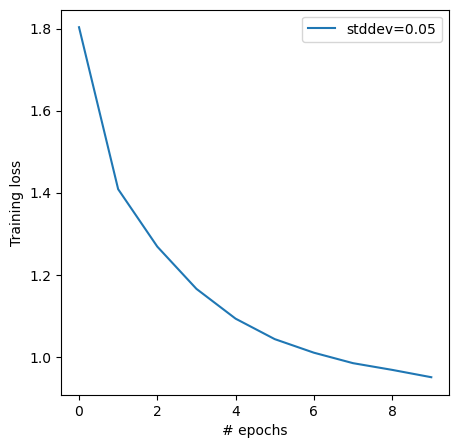

In [67]:
plt.figure(figsize = (5,5))
plt.plot(history.history['loss'],label = "stddev=0.05")
plt.xlabel('# epochs')
plt.ylabel('Training loss')
#plt.ylim(0, 0.5)
plt.legend(loc='best')
plt.show()

> Faire de même avec les initialiseurs suivants :    
> `mon_init2 = initializers.RandomNormal(mean=0.0,stddev=10)`   
> `mon_init3 = initializers.RandomNormal(mean=0.0,stddev=0.001)` \
> `mon_init4 = initializers.glorot_uniform()`    

In [68]:
mon_init2 = initializers.RandomNormal(mean=0.0, stddev=10)

model_2 = Sequential()
model_2.add(Dense(H,input_dim=N, activation='tanh', kernel_initializer=mon_init2))
model_2.add(Dense(K,input_dim=N, activation='tanh',kernel_initializer=mon_init2))
model_2.add(Activation("softmax"))

sgd = SGD(learning_rate=0.01, momentum = 0.9)
model_2.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

X_train_nor2, X_test_nor2, y_train2, y_test2 = train_test_split(digits.data_nor,digits.target, test_size=0.2)

Y_train2 = to_categorical(y_train2)
y_test2 = to_categorical(y_test2)
history = model_2.fit(X_train_nor2,Y_train2,epochs=20,batch_size=35)

Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0605 - loss: 2.8537    
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0619 - loss: 2.8413 
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0619 - loss: 2.8369 
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0626 - loss: 2.8311 
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0633 - loss: 2.8285 
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0633 - loss: 2.8266 
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0633 - loss: 2.8249 
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0633 - loss: 2.8243     
Epoch 9/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0633 - loss: 2.8228     
Epoch 10/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0633 - loss: 2.8214 
Epoch 11/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0633 - loss: 2.8211 
Epoch 12/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -

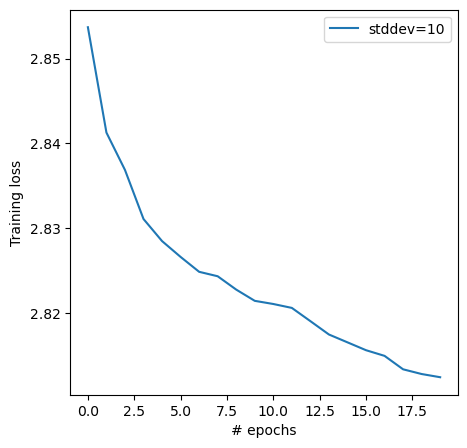

In [69]:
plt.figure(figsize = (5,5))
plt.plot(history.history['loss'],label = "stddev=10")
plt.xlabel('# epochs')
plt.ylabel('Training loss')
#plt.ylim(0, 6)
plt.legend(loc='best')
plt.show()

In [70]:
mon_init3 = initializers.RandomNormal(mean=0.0, stddev=0.001)

model_5 = Sequential()
model_5.add(Dense(H,input_dim=N, activation='tanh', kernel_initializer=mon_init3))
model_5.add(Dense(K,input_dim=N, activation='tanh',kernel_initializer=mon_init3))
model_5.add(Activation("softmax"))

sgd = SGD(learning_rate=0.01, momentum = 0.9)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

X_train_nor5, X_test_nor5, y_train5, y_test5 = train_test_split(digits.data_nor,digits.target, test_size=0.2)

Y_train5 = to_categorical(y_train5)
y_test5 = to_categorical(y_test5)
history5 = model.fit(X_train_nor5,Y_train5,epochs=10,batch_size=35)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9937 - loss: 0.0229   
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9972 - loss: 0.0174 
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9965 - loss: 0.0140 
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9972 - loss: 0.0126 
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9979 - loss: 0.0113 
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0105 
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0096 
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0091 
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0086 
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0082 


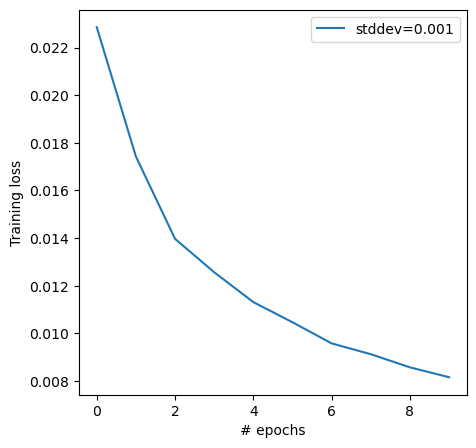

In [71]:
plt.figure(figsize = (5,5))
plt.plot(history5.history['loss'],label = "stddev=0.001")
plt.xlabel('# epochs')
plt.ylabel('Training loss')
#plt.ylim(0, 6)
plt.legend(loc='best')
plt.show()

In [72]:
mon_init4 = initializers.glorot_uniform()

model_4 = Sequential()
model_4.add(Dense(H,input_dim=N, activation='tanh', kernel_initializer=mon_init4))
model_4.add(Dense(K,input_dim=N, activation='tanh',kernel_initializer=mon_init4))
model_4.add(Activation("softmax"))

sgd = SGD(learning_rate=0.01, momentum = 0.9)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

X_train_nor, X_test_nor, y_train, y_test = train_test_split(digits.data_nor,digits.target, test_size=0.2)

Y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
history = model.fit(X_train_nor,Y_train,epochs=10,batch_size=35)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0079
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0075 
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0071 
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0068 
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0065 
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0063 
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0061 
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0058 
Epoch 9/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0057  
Epoch 10/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0056 


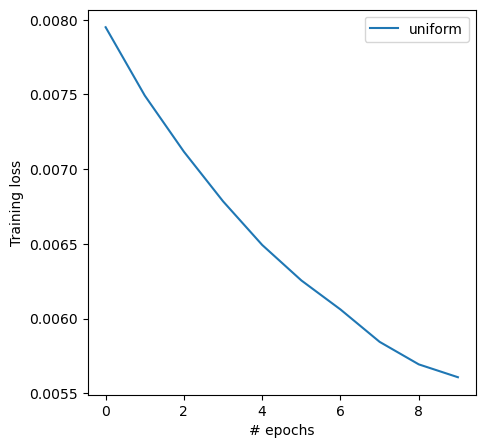

In [73]:
plt.figure(figsize = (5,5))
plt.plot(history.history['loss'],label = "uniform")
plt.xlabel('# epochs')
plt.ylabel('Training loss')
#plt.ylim(0, 6)
plt.legend(loc='best')
plt.show()

> Comparer les performance des réseaux ajustés avec ces initialiseurs en représentant les "trajectoires d'apprentissage".

On constate que plus l'ecart type est pétit, plus l'erreur decroit plus vite. L'écart-type mésure l'écart entre les données et la moyenne. Du fait de ce faible écart, les données sont plus proches. Ainsi il est plus facile pour le modèle de s'ajuster d'une donnée à une autre.
Le modèle uniforme convergence rapidement et est stable.

Conclusion:
- Initialisation trop proche de zero : gradients trop faibles et SGD peine à sortir de cette zone ...
- Initialisation avec des amplitudes trop élevées : les couches intermédiaires ont des gradients qui s'annulent et difficile là encore de sortir de cette zone

### Early Stopping


L'argument ` validation_split=0.1` dans la méthode `.fit()` permet d'évaluer la perte sur un échantillon de validation. 

> Vérifier graphiquement qu'après un certain nombre d'itérations (quelques centaines epochs ici), le risque et la précision sur l'échantillon de validation  finissent par se dégrader. 

Les réseaux de neurones, même sans parler des architectures "profondes", nécessitent d'ajuster un très grand nombre de paramètres. Il est donc naturel de devoir contrôler la complexité statistique de ces prédicteurs pour en obtenir les meilleurs erreurs de généralisation. 

A chaque pas de la descente de gradient l'ensemble des poids et des biais du réseau est mis à jour. A chaque pas de la descente correspond donc un prédicteur, et au final on dispose donc d'une suite de prédicteurs. Le prédicteur final (du dernier pas de gradient) est certes celui qui minimise le risque empirique (appelée ici perte) mais cela ne signifie évidemment pas que ce prédicteur a les meilleurs performances sur l'échantillon de validation (ou de test).

Typiquement, le long de la descente de gradient, le biais du prédicteur construit tend à diminuer alors que la variance tend à augmenter. Il s'agit donc de choisir le nombre de pas de gradients pour réaliser un compromis optimal entre biais et variance. Noter que le nombre de pas de gradients joue ici le rôle de mesure de la complexité statistique.


La méthode classiquement utilisée pour choisir le nombre de pas de gradients est celle du "early stopping".  Le principe consiste tout simplement à stopper la descente de gradient stochastique lorsque l'erreur de validation remonte. **L'argument `monitor='val_loss'` de la fonction `EarlyStopping` indique que c'est l'erreur de validation calculée pour la perte (ici cross entropy) qui sera surveillée.**

In [74]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

Le long d'une trajectoire de descente de gradient, il est possible que la perte remonte ponctuellement sur une itération, avant de redescendre aussitôt. Il est donc préférable de ne prendre la décision d'arrêter la descente de gradient que si cette remontée se confirme sur quelques itérations successives. L'argument `patience=5` impose à la descente de gradient de patienter 5 itérations après une remontée de la perte, avant de prendre la décision d'arrêter  ou non l'algorithme.

In [75]:
model = Sequential()

model.add(Dense(H,input_dim=N, kernel_initializer=mon_init4))
model.add(Activation("tanh"))
model.add(Dense(K,kernel_initializer=mon_init4))
model.add(Activation("tanh"))
model.add(Dense(K,kernel_initializer=mon_init4))
model.add(Activation("softmax"))
sgd = SGD(learning_rate=0.1) 

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics = ['accuracy'] )

history = model.fit(X_train_nor, Y_train,epochs=500,
          batch_size=32,
          validation_split=0.1,
          callbacks=[early_stopping])
#,verbose=0 est utilisé pour éviter l'affichage ci-dessous.
#X_train_nor, Y_train : données d’entraînement et labels one-hot.
#epochs=500 : nombre maximum d’itérations sur tout le jeu d’entraînement.
#batch_size=32 : nombre d’exemples par mini-batch.
#verbose=0 : pas d’affichage des logs pendant l’entraînement.
#validation_split=0.1 : 10% des données d’entraînement sont utilisées pour la validation.
#callbacks=[early_stopping] : arrêt automatique si la performance sur validation ne s’améliore plus.

Epoch 1/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6744 - loss: 1.3344 - val_accuracy: 0.8403 - val_loss: 0.9039
Epoch 2/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8956 - loss: 0.6997 - val_accuracy: 0.9097 - val_loss: 0.5976
Epoch 3/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9335 - loss: 0.4678 - val_accuracy: 0.9306 - val_loss: 0.4435
Epoch 4/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9598 - loss: 0.3457 - val_accuracy: 0.9236 - val_loss: 0.3619
Epoch 5/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9667 - loss: 0.2721 - val_accuracy: 0.9444 - val_loss: 0.3070
Epoch 6/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9729 - loss: 0.2226 - val_accuracy: 0.9444 - val_loss: 0.2703
Epoch 7/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9814 - loss: 0.1888 - val_accuracy: 0.9444 - val_loss: 0.2461
Epoch 8/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9861 - loss: 0.1627 - val_accuracy: 0.9444 - 

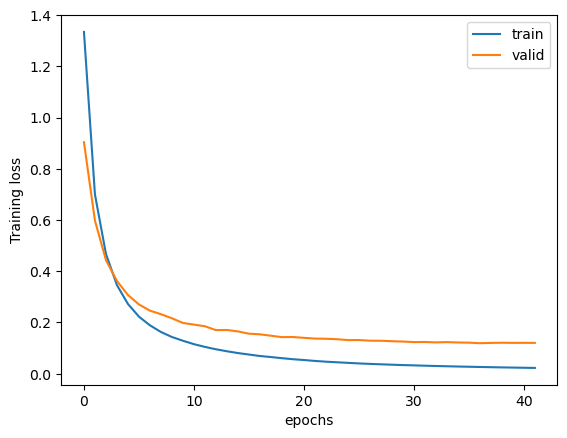

In [76]:
plt.plot(history.history['loss'],label ="train") #C’est la fonction de perte calculée sur le jeu d’entraînement pendant l’apprentissage.
#Si le loss diminue au fil des epochs → le modèle apprend à reproduire correctement les labels sur les données d’entraînement.
plt.plot(history.history['val_loss'],label ="valid") #C’est la fonction de perte calculée sur un sous-ensemble de validation (non vu pendant l’entraînement).
#Si val_loss diminue → le modèle généralise bien.
#Si val_loss commence à augmenter alors que loss continue de décroître → overfitting : le modèle s’adapte trop aux données d’entraînement et perd sa capacité à généraliser.
plt.xlabel('epochs')
plt.ylabel('Training loss')
plt.legend(loc='best');
plt.show()

> Donner la prédiction du dernier modèle ajusté (par early stopping) sur l'échantillon test `X_test_nor`. Calculer le risque estimé sur les données de test en utilisant la méthode `.evaluate()`. Calculer enfin le taux de mauvais classement sur l'échantillon test.

In [77]:
y_predicted = model.predict(X_test_nor)
model.evaluate(X_test_nor,y_predicted)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.1607 


[0.16074882447719574, 1.0]

## Application : Données MNIST

Charger les données [handwritten digits MNIST](http://yann.lecun.com/exdb/mnist/) :

In [174]:
from tensorflow.keras.datasets import mnist # subroutines for fetching the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()  

height, width, depth = 28, 28, 1 #  28x28 and 1 canal pour le niveau de gris
num_classes = 10

num_train = 60000 
num_test = 10000  

X_train = X_train.reshape(num_train, height * width)  # vecteur 
X_test = X_test.reshape(num_test, height * width) # vecteur 

X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')

X_train_nor = X_train / 255 # normalisation dans  [0, 1]  
X_test_nor = X_test / 255 # normalisation dans  [0, 1]  

In [114]:
#Y_train = to_categorical(y_train, num_classes)
#Y_test = to_categorical(y_test, num_classes)

In [121]:
len(Y_train)==len(X_train)

True

> Définir et ajuster un réseau de neurones à deux couches cachées. 
> On pourra dans un premier temps choisir les paramètres ci-dessous. 
> On pourra aussi utiliser l'optimiseur adagrad :    
> `adag = tensorflow.keras.optimizers.Adagrad(lr=0.01)`

In [175]:
batch_size_adag = 128  
num_epochs = 40  
hidden_size = 512  

In [176]:
import tensorflow
model = Sequential()

model.add(Dense(H,input_dim=784, kernel_initializer=mon_init1))
model.add(Activation("tanh"))
model.add(Dense(K, input_dim = 784,kernel_initializer=mon_init1))
model.add(Activation("tanh"))
model.add(Activation("softmax"))

adag = tensorflow.keras.optimizers.Adagrad(learning_rate=0.01) 

In [153]:
model.compile(loss='categorical_crossentropy', optimizer =adag, metrics=['accuracy'])

In [154]:
model.summary()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_49 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_50 (Activation)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_51 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

In [160]:
history_adag = model.fit(X_train_nor,Y_train,epochs= num_epochs,validation_split=0.1, batch_size = batch_size_adag)

Epoch 1/40
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9433 - loss: 0.9164 - val_accuracy: 0.9587 - val_loss: 0.8908
Epoch 2/40
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9436 - loss: 0.9154 - val_accuracy: 0.9587 - val_loss: 0.8907
Epoch 3/40
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9440 - loss: 0.9144 - val_accuracy: 0.9595 - val_loss: 0.8903
Epoch 4/40
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9445 - loss: 0.9134 - val_accuracy: 0.9597 - val_loss: 0.8897
Epoch 5/40
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9449 - loss: 0.9125 - val_accuracy: 0.9597 - val_loss: 0.8890
Epoch 6/40
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9455 - loss: 0.9115 - val_accuracy: 0.9602 - val_loss: 0.8887
Epoch 7/40
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9459 - loss: 0.9106 - val_accuracy: 0.9600 - val_loss: 0.8883
Epoch 8/40
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9462 - loss: 0.9098 - val_accur

In [161]:
history_adag.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

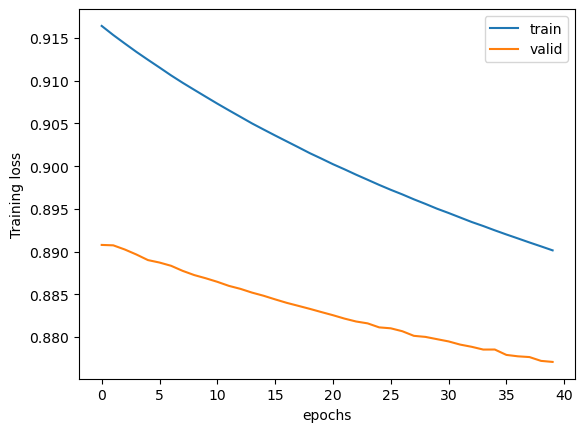

In [163]:
plt.plot(history_adag.history['loss'],label ="train") 
plt.plot(history_adag.history['val_loss'],label ="valid") 
plt.xlabel('epochs')
plt.ylabel('Training loss')
plt.legend(loc='best');
plt.show()

> En reproduisant les codes proposés sur ce [blog](https://machinelearningmastery.com/use-keras-deep-learning-models-scikit-learn-python/), essayer d'améliorer les performances de votre réseau en choisissant mieux les paramètres par validation croisée à l'aide de la fonction `GridSearchCV` de sckit-learn. Attention, cette validation croisée s'avère très couteuse en temps de calcul...

In [165]:
pip install scikeras

In [179]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam, SGD, Adagrad
from scikeras.wrappers import KerasClassifier

sgd =SGD(learning_rate=0.1, momentum=0.9)
adam = Adam(learning_rate=0.1)

def create_model(optimizer='adam', init='glorot_uniform'):
    model = Sequential()
    model.add(Dense(128, input_dim=784, kernel_initializer=init, activation='tanh'))
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# --- Wrapper scikit-learn ---
model = KerasClassifier(model=create_model, verbose=0)

param_grid = {
    # paramètres internes de la fonction create_model doivent être préfixés model__
    "model__optimizer": ["adam", "sgd", "adagrad"],
    "model__init": ["glorot_uniform", "he_normal"],
    # paramètres du wrapper (epochs, batch_size) à la racine
    "epochs": [5],        # petit pour tests rapides
    "batch_size": [128]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2)
#grid_result = grid.fit(X_train, Y_train)

#print(f"\n Meilleur score : {grid_result.best_score_:.4f}")
#print(f" Meilleurs paramètres : {grid_result.best_params_}")

In [180]:
grid.fit(X_train, Y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'